<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.1: Bagging + BOOSTING + STACKING ALL TOGETHER

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset (`breast-cancer-wisconsin-data-old.csv`). The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.
## Answer : 
Can we accurately classify whether a breast tumor is malignant or benign based on the given set of features?"

Detailed Objectives:
Classification: The primary goal is to build a predictive model that can classify a given sample of tumor features as either malignant (cancerous) or benign (non-cancerous).
Feature Importance: Determine which features (e.g., radius, texture, perimeter, area, smoothness) are most important in predicting whether a tumor is malignant or benign.
Model Evaluation: Assess the performance of the predictive model using metrics such as accuracy, precision, recall, and F1 score to ensure the model's reliability and effectiveness.
Generalization: Ensure that the model generalizes well to new, unseen data, which is critical for its practical application in medical diagnostics.
Decision Support: Provide a tool that can assist medical professionals in making more informed decisions based on the predicted classification of tumors.


# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data  - Below all together
- Read the data
- Perform some basic structural cleaning to facilitate the work

# Step 4: Explore and Clean the Data   - Below all together
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

# Step 5: Prepare the Data -  - Below all together
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

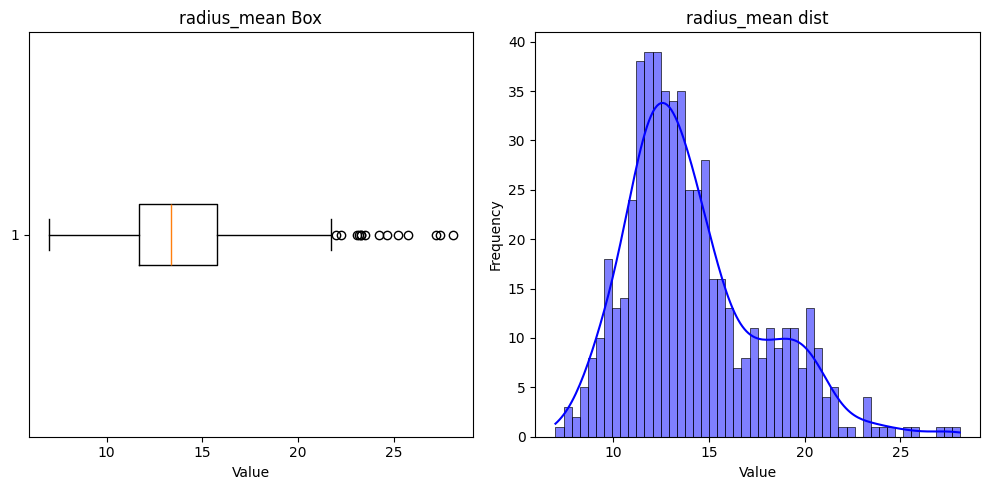

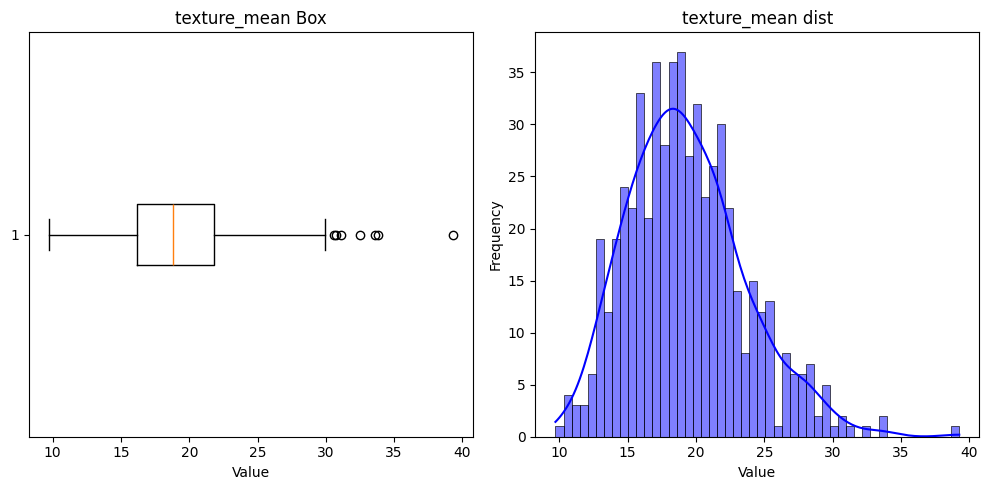

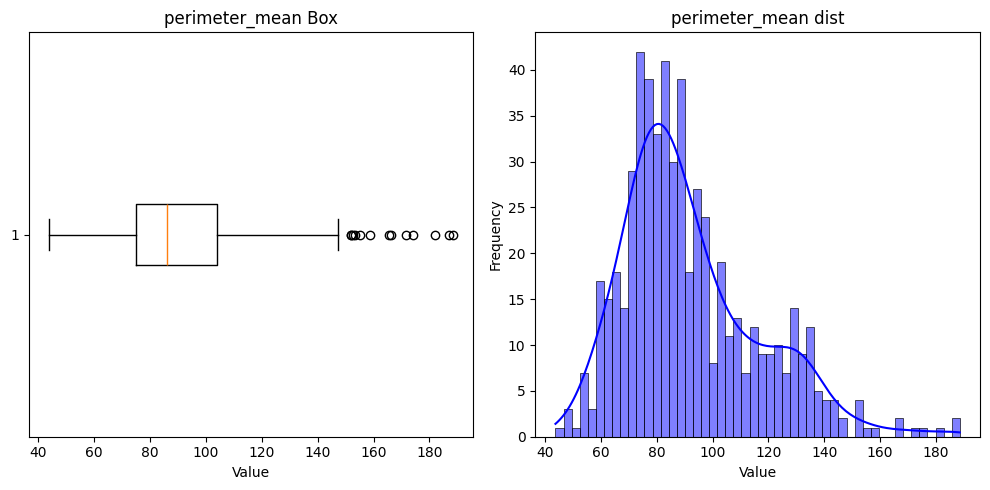

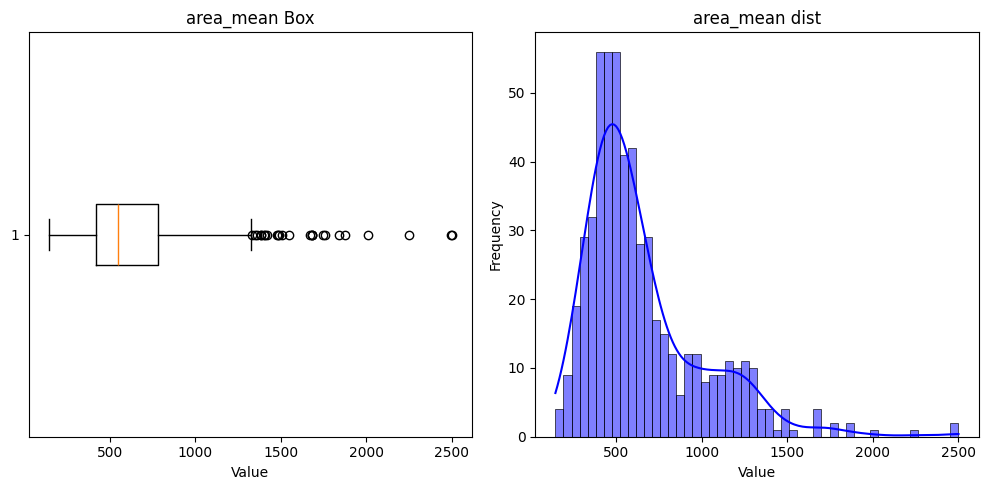

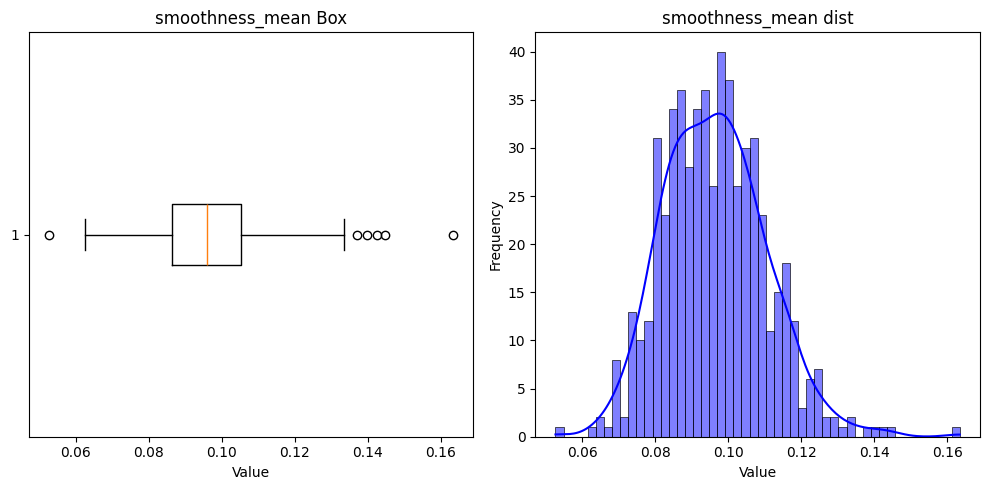

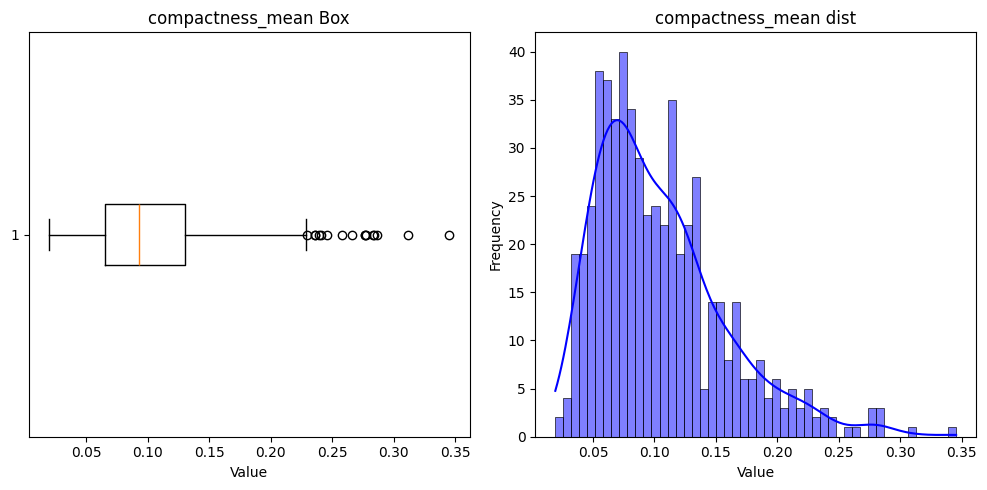

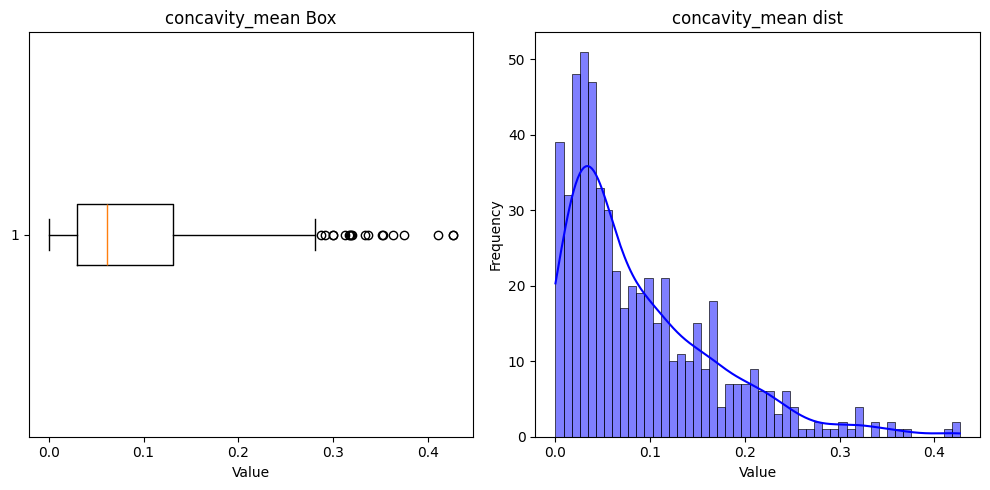

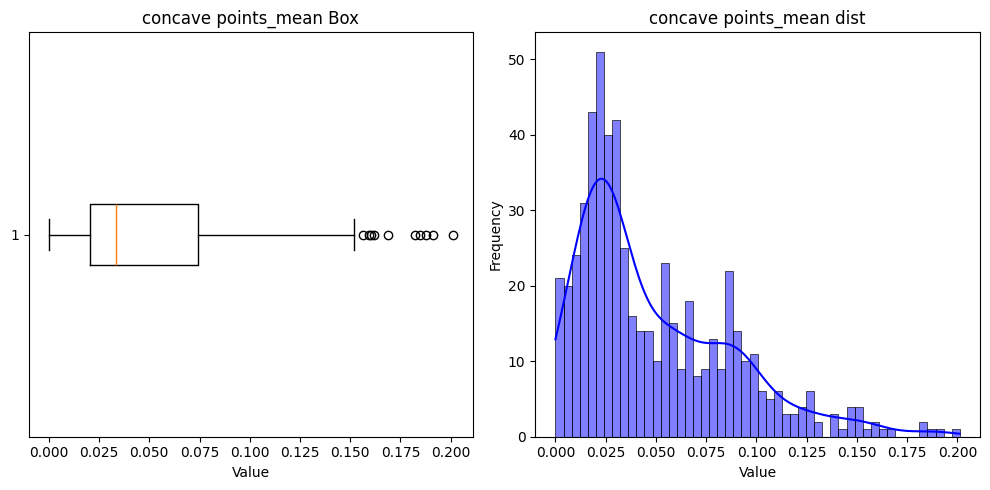

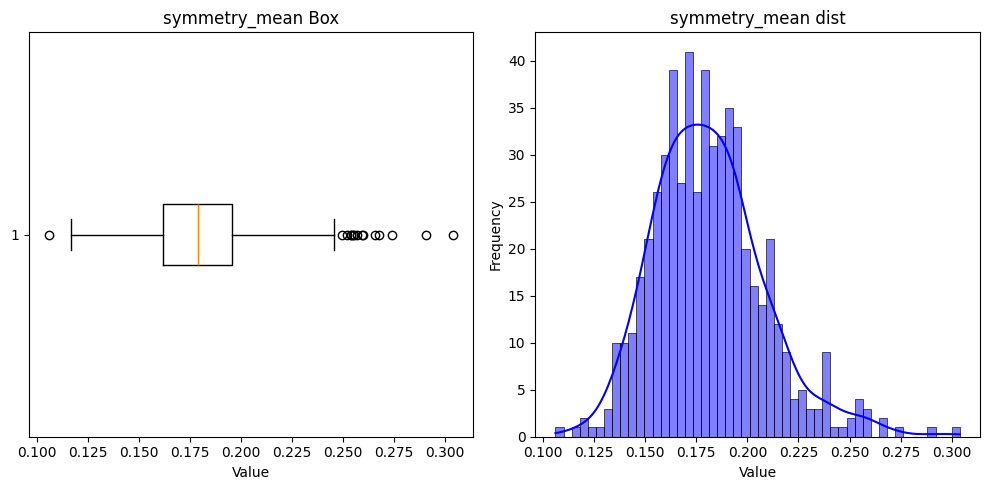

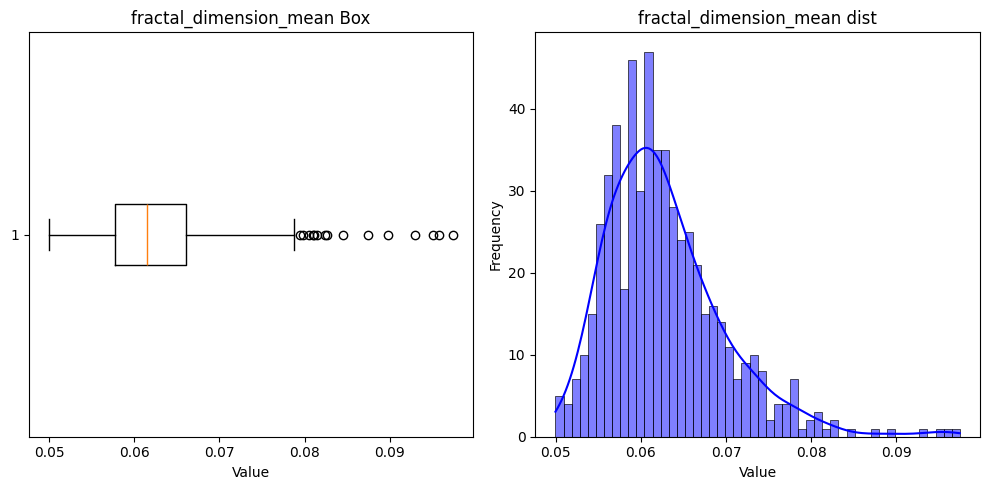

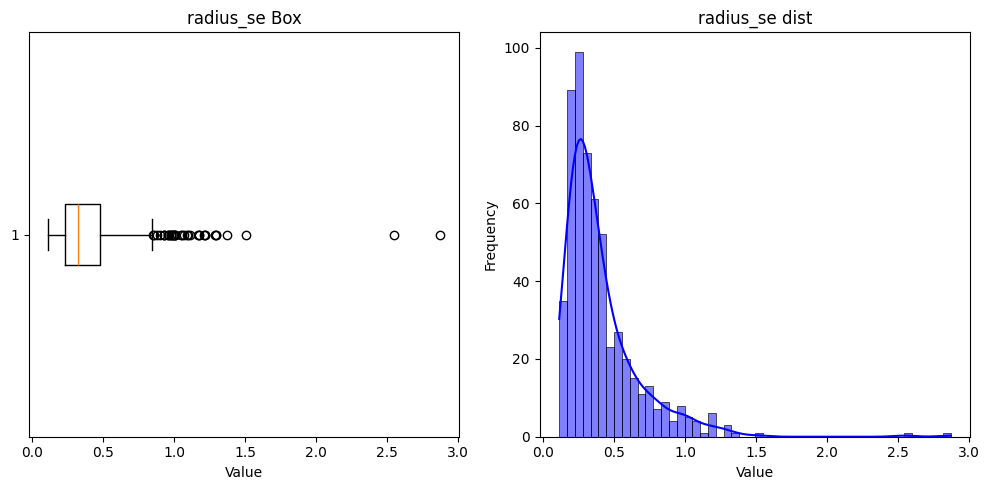

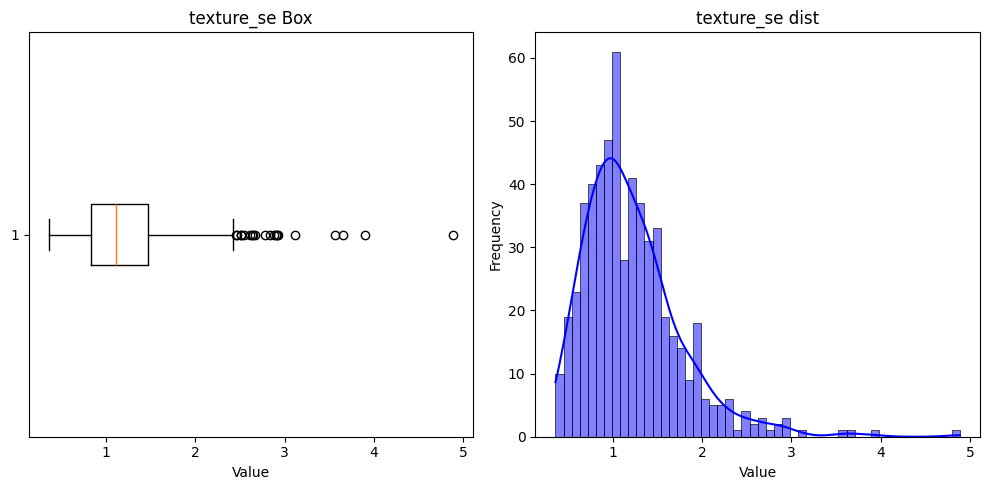

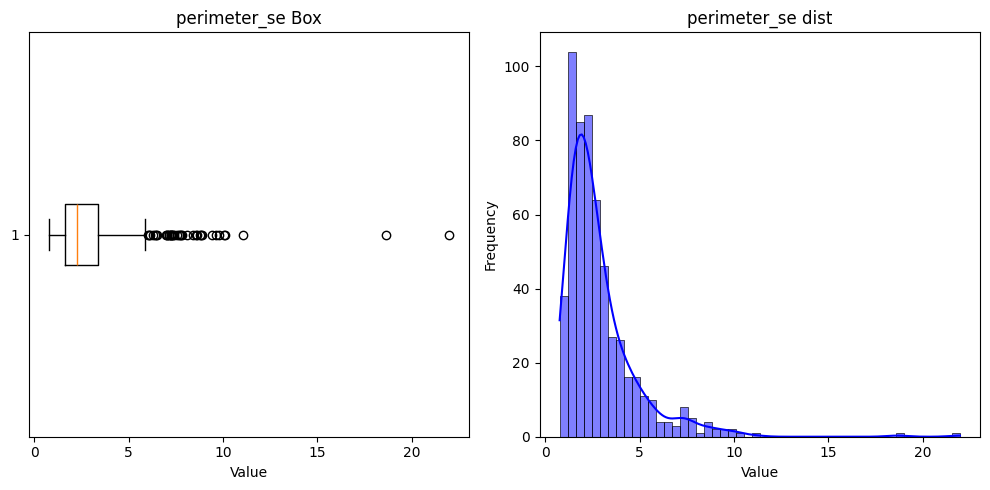

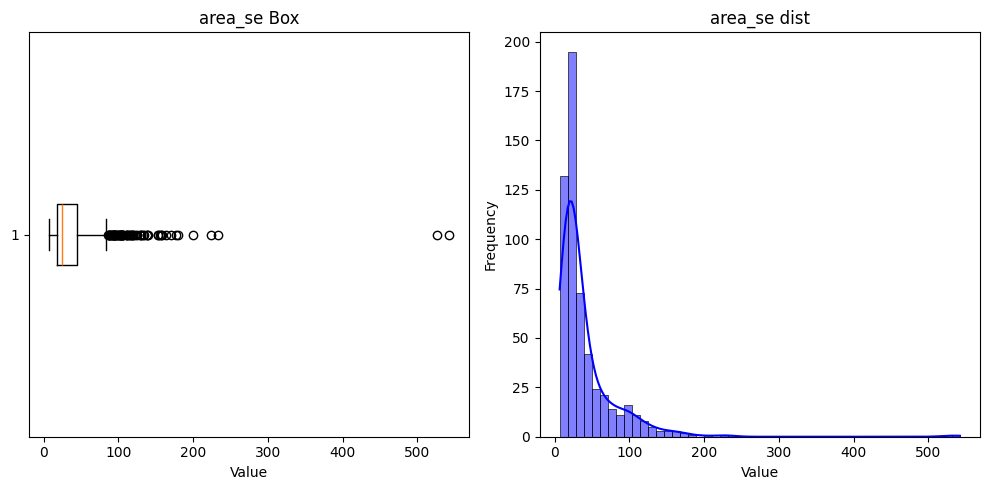

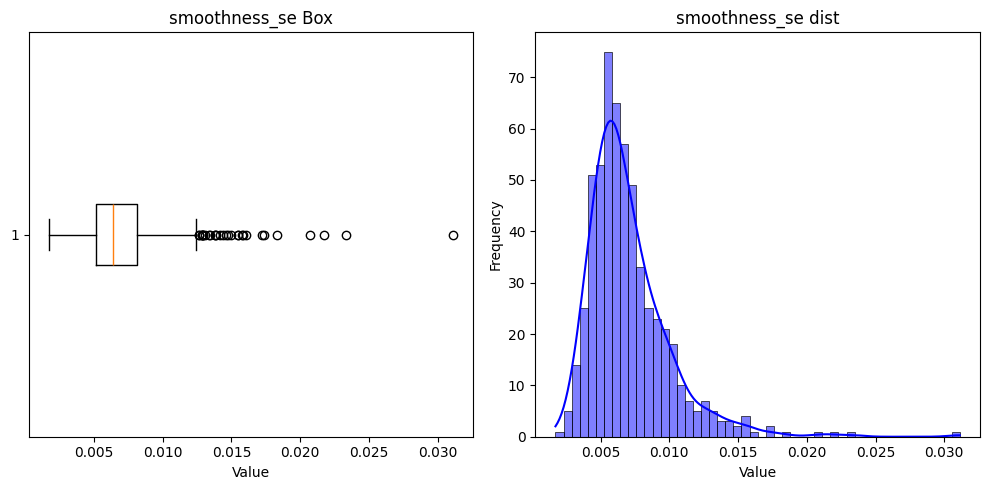

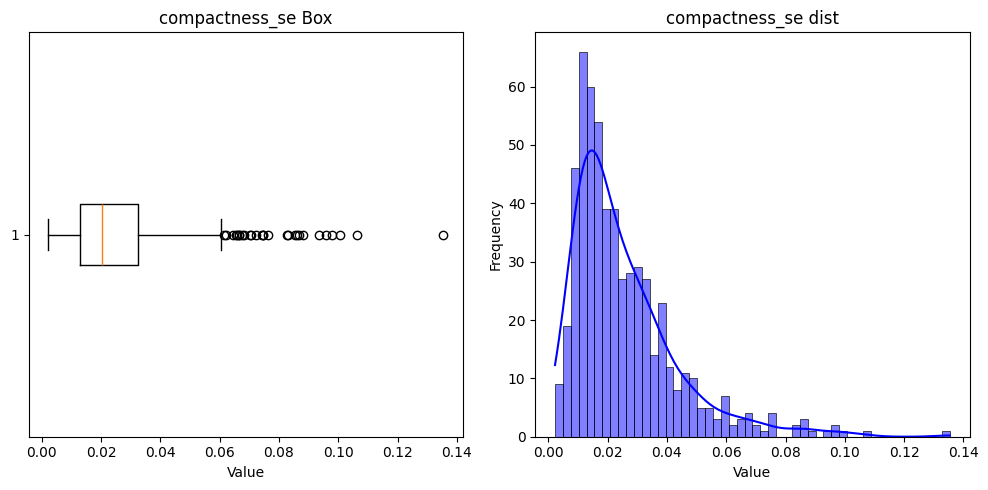

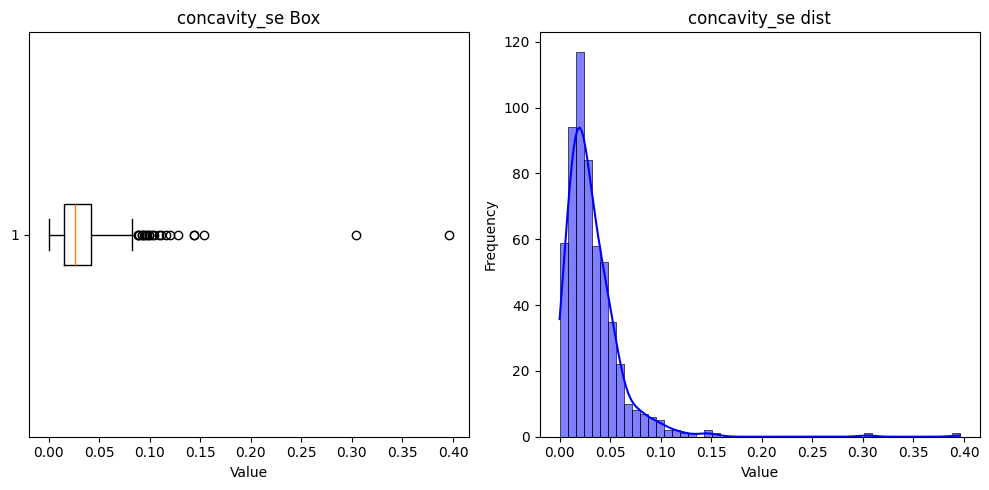

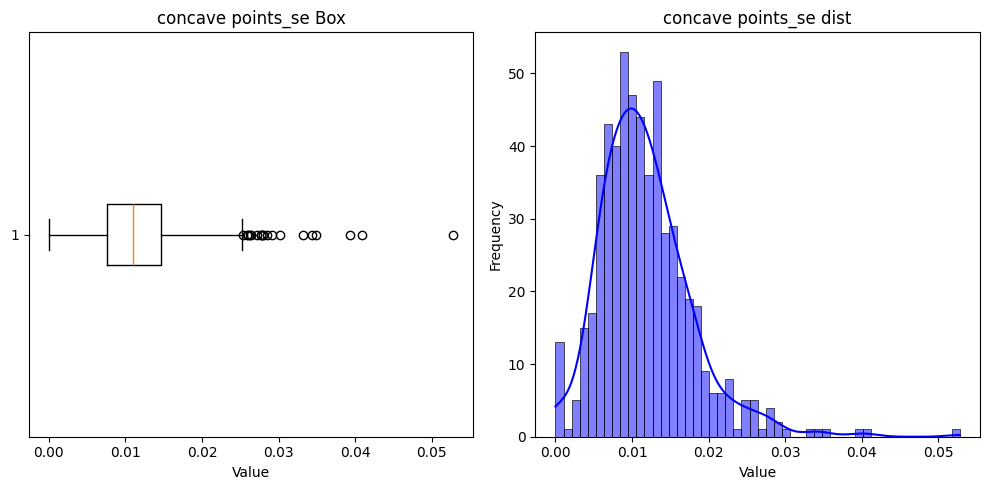

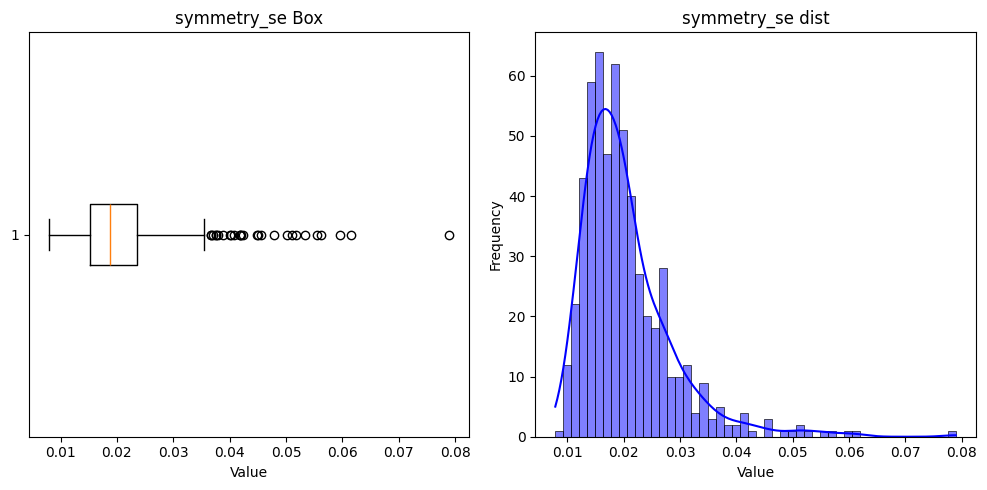

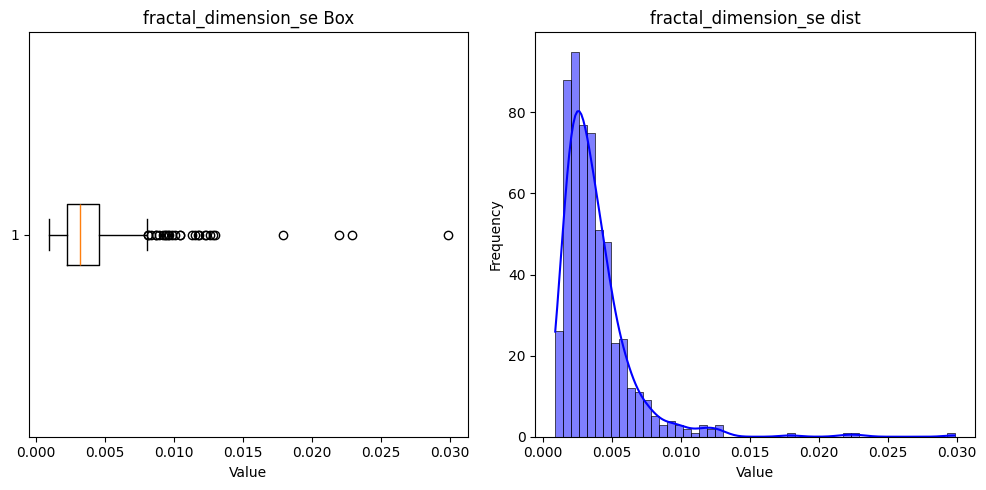

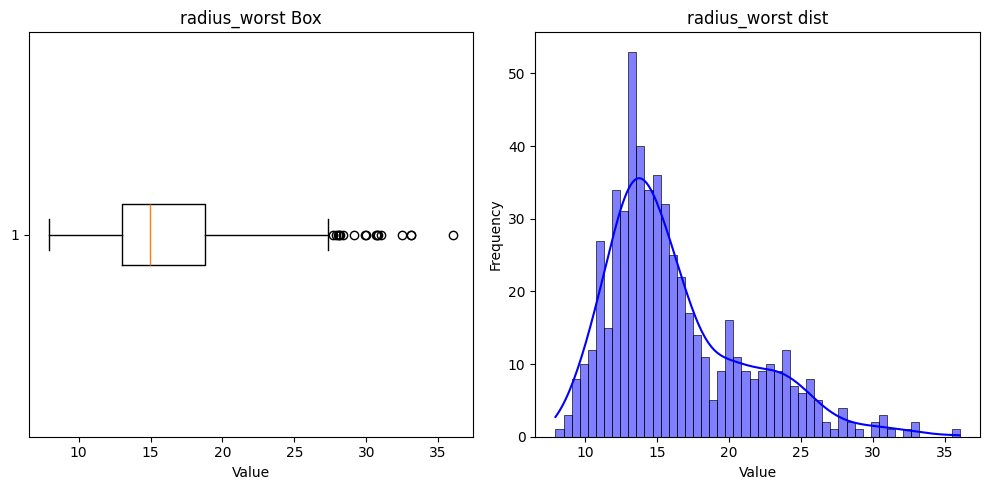

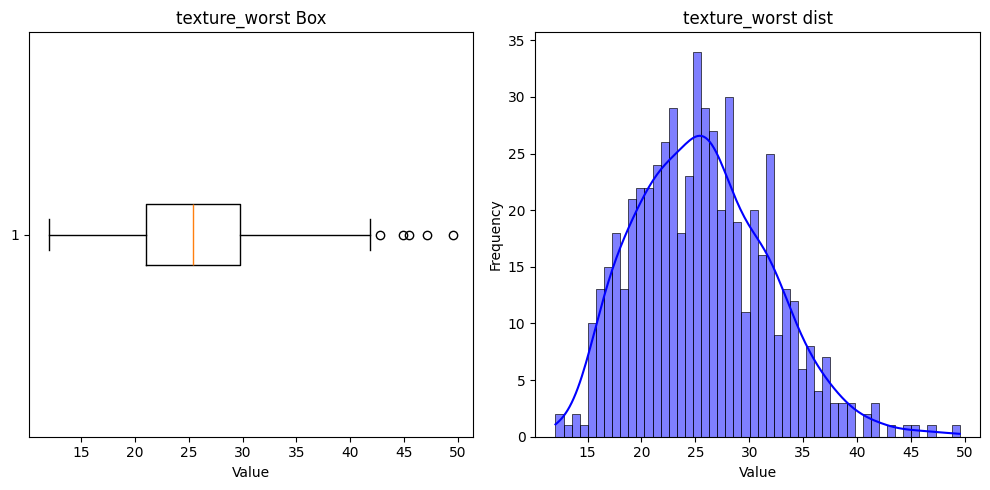

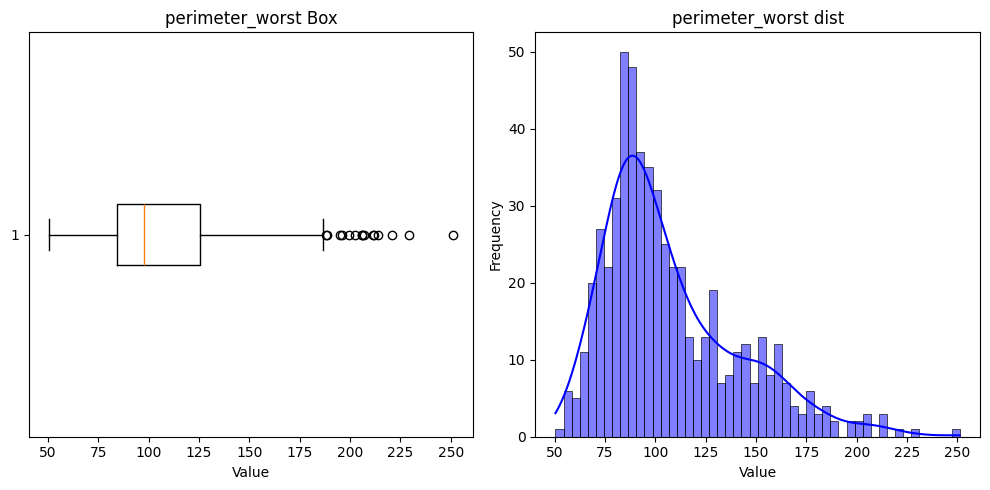

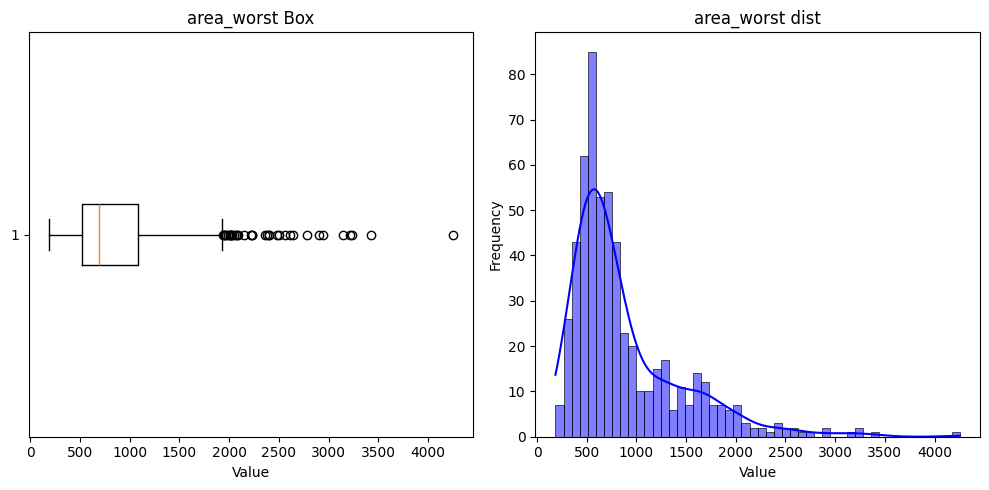

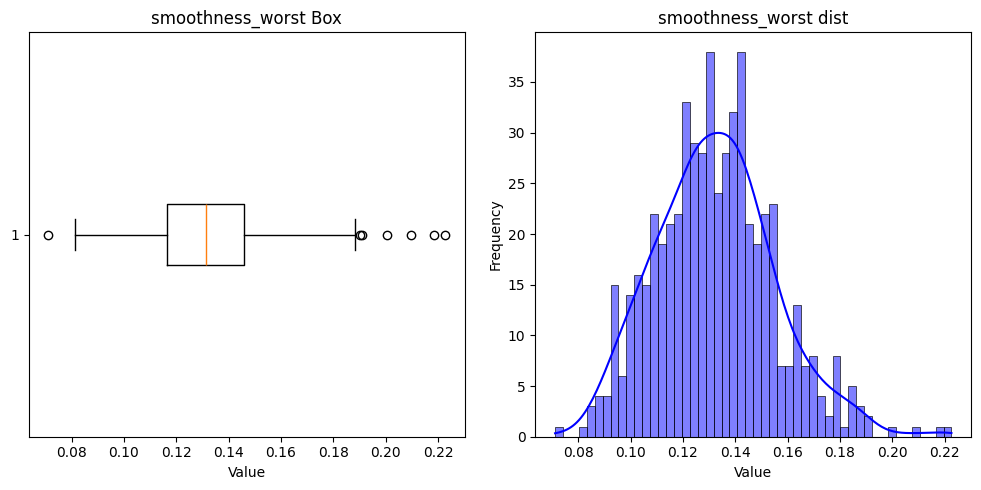

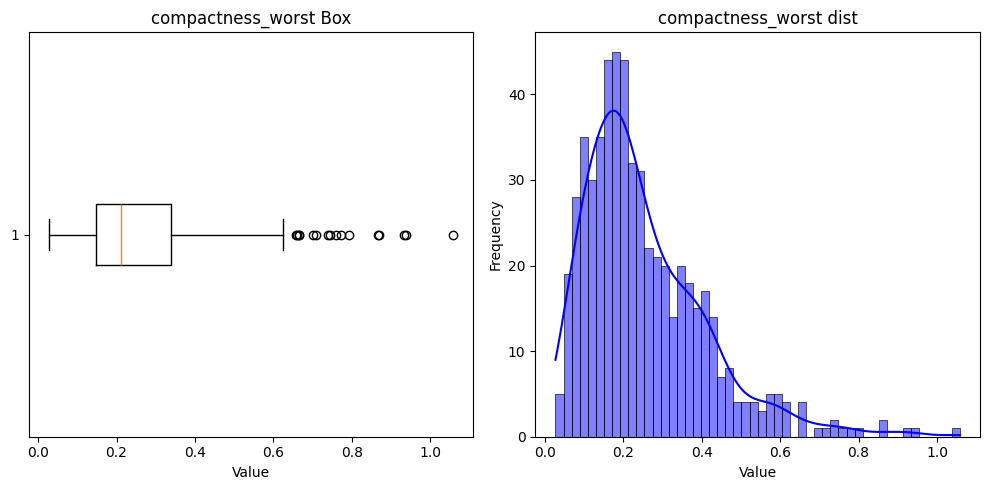

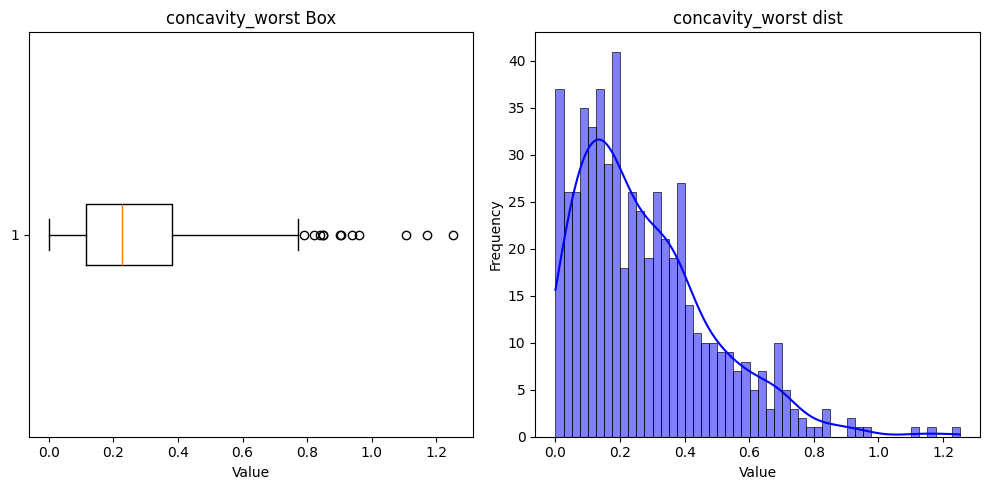

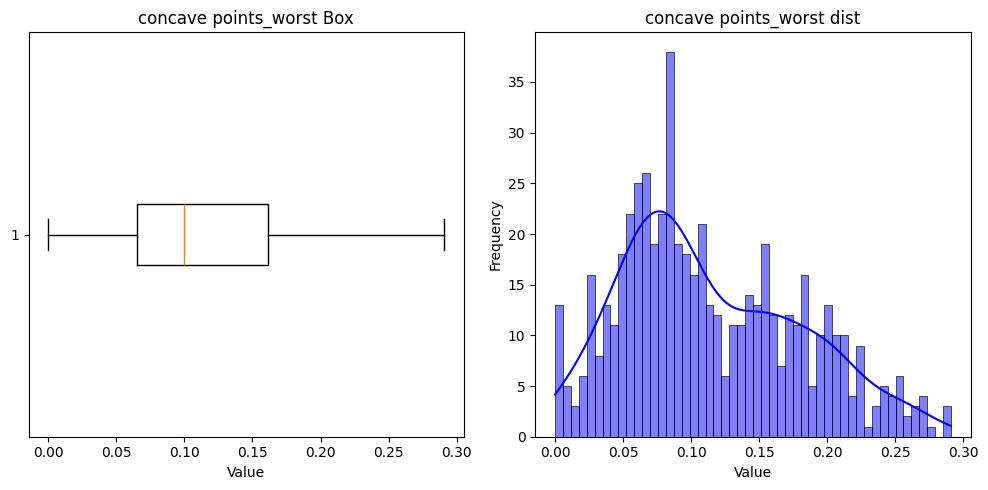

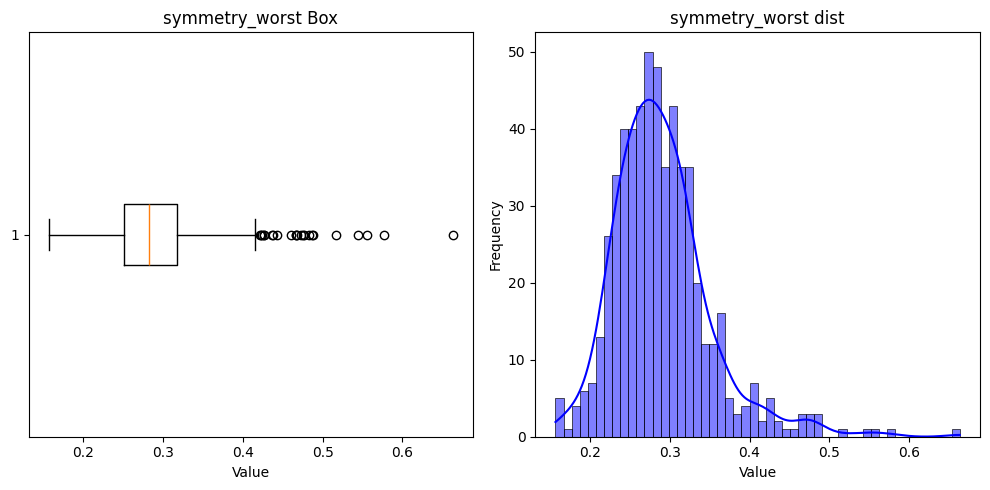

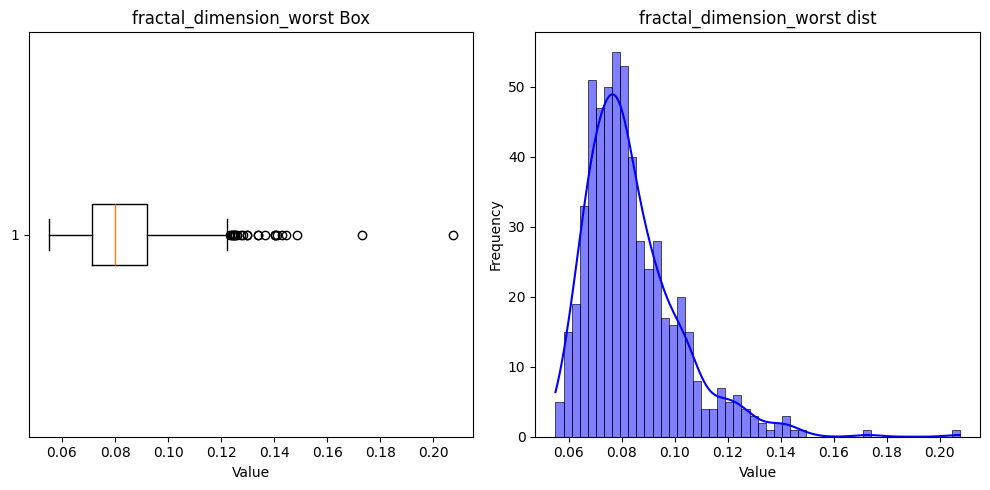

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

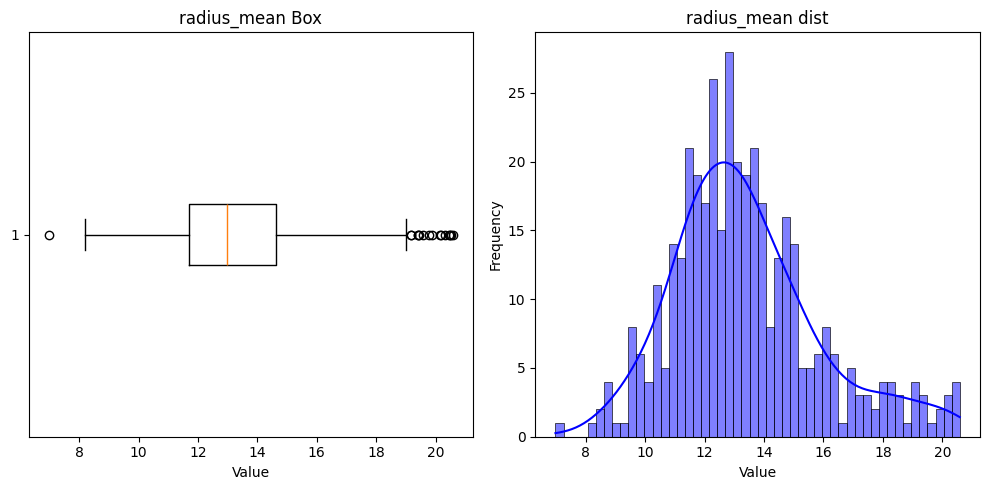

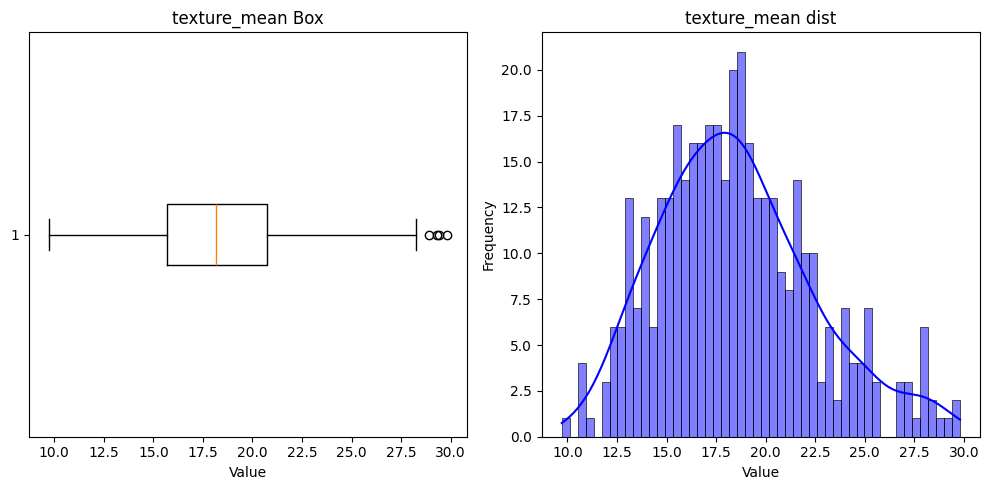

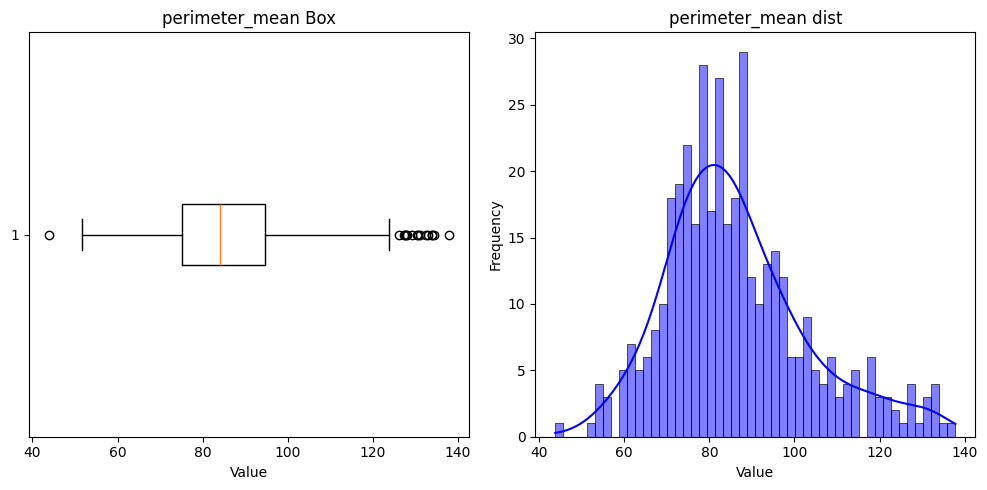

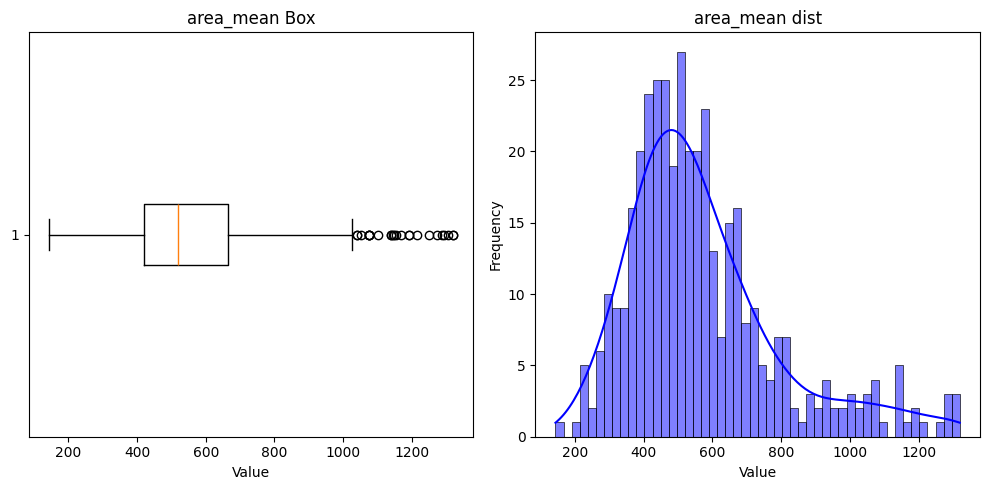

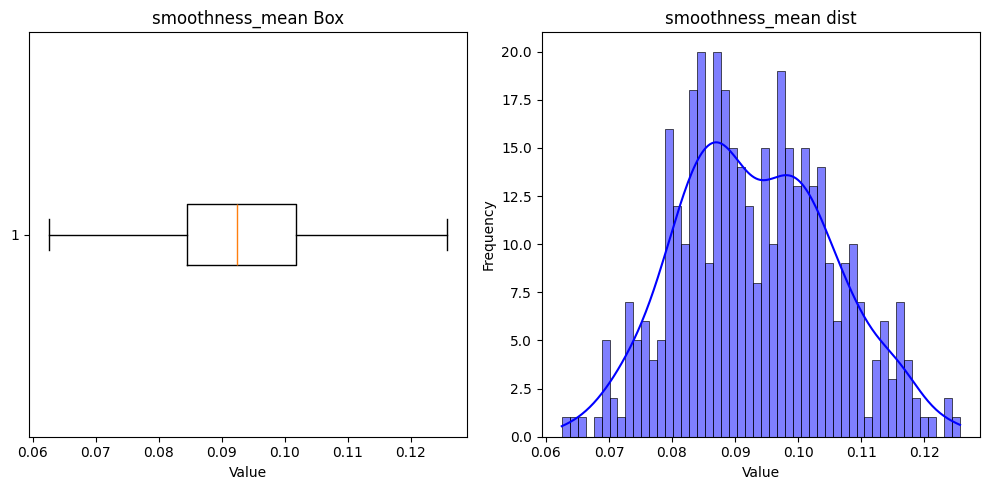

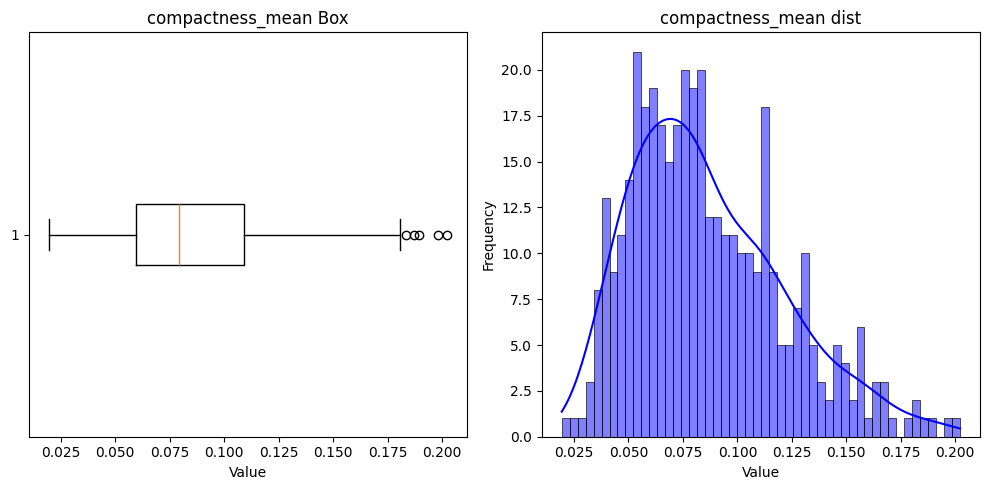

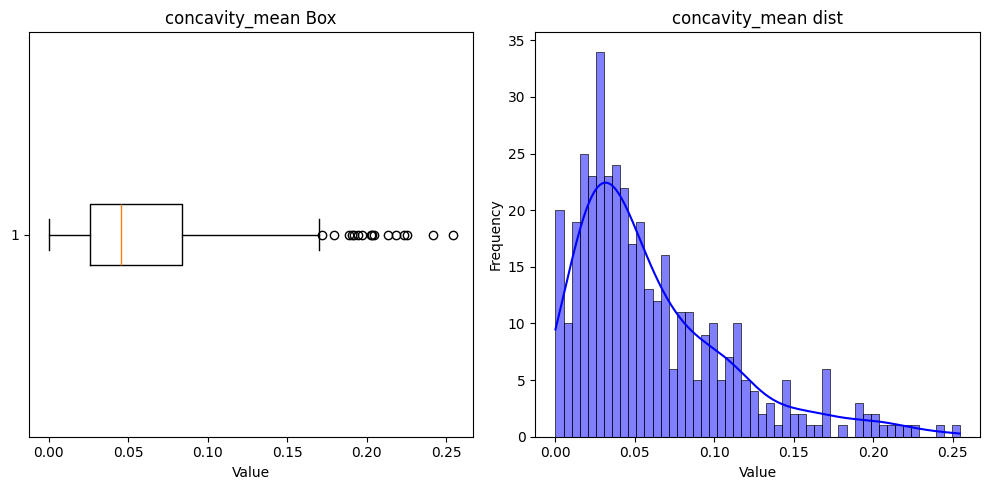

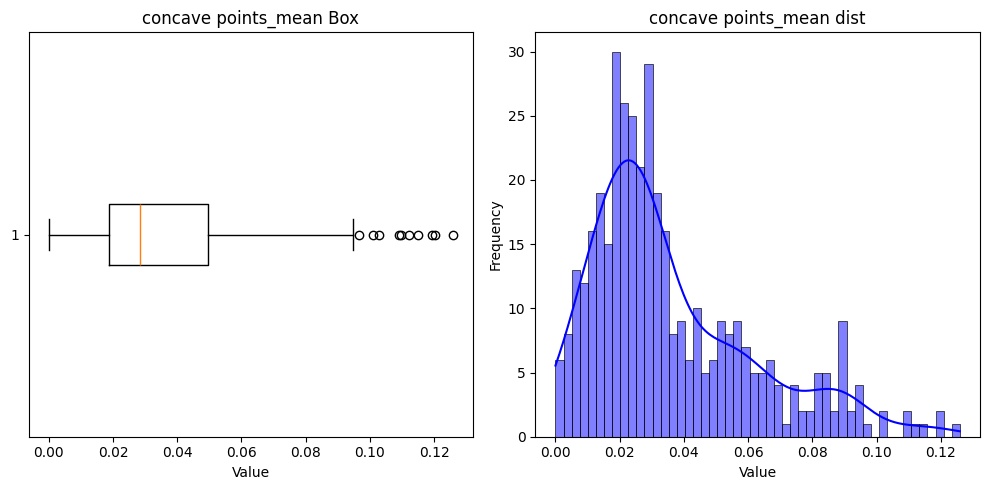

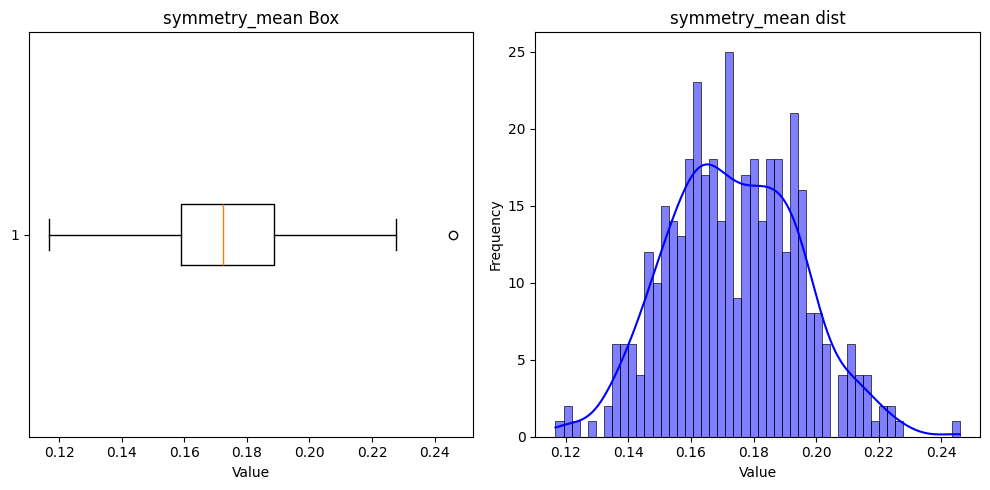

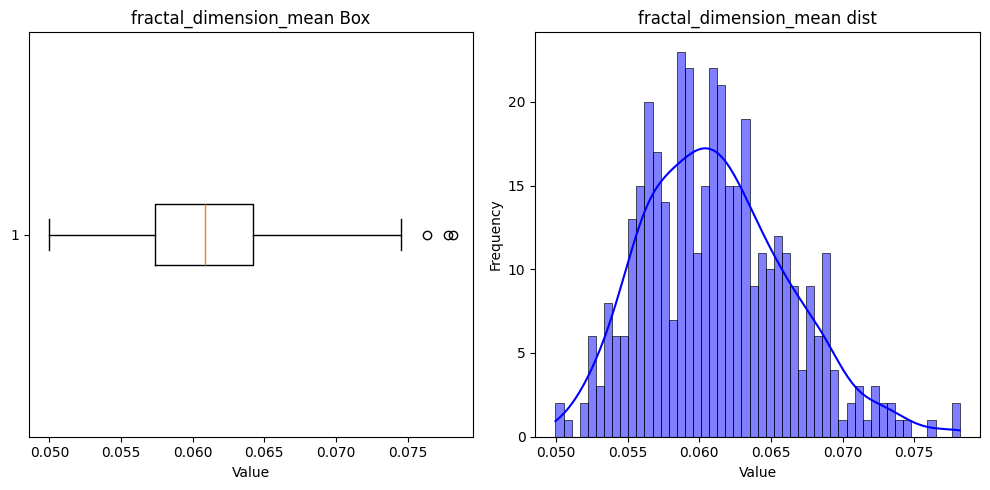

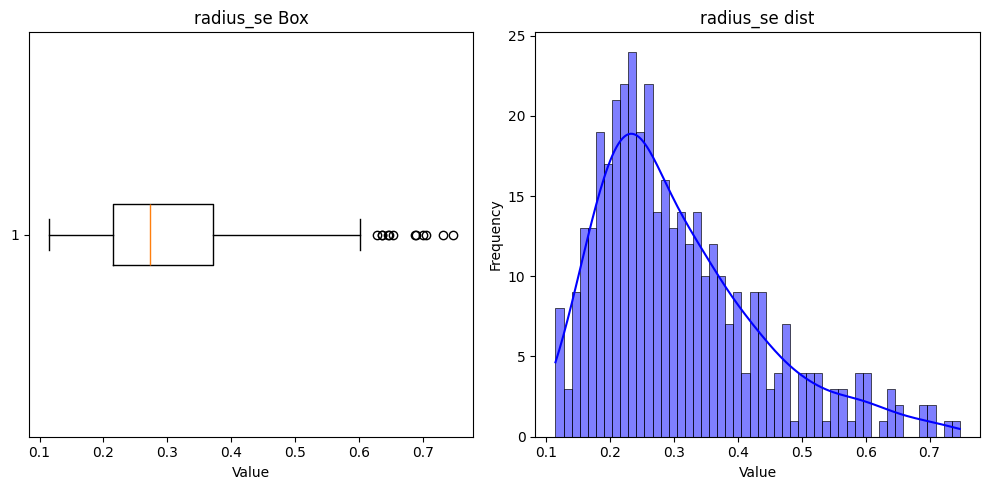

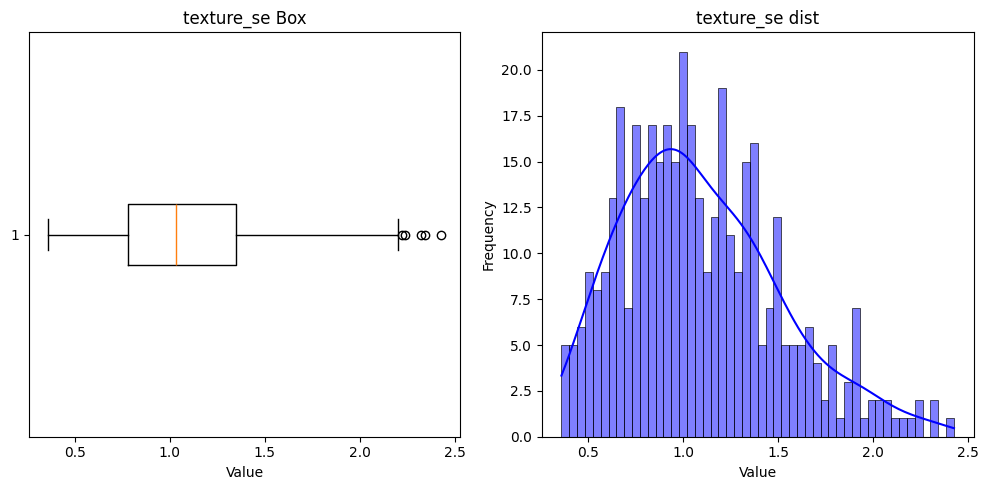

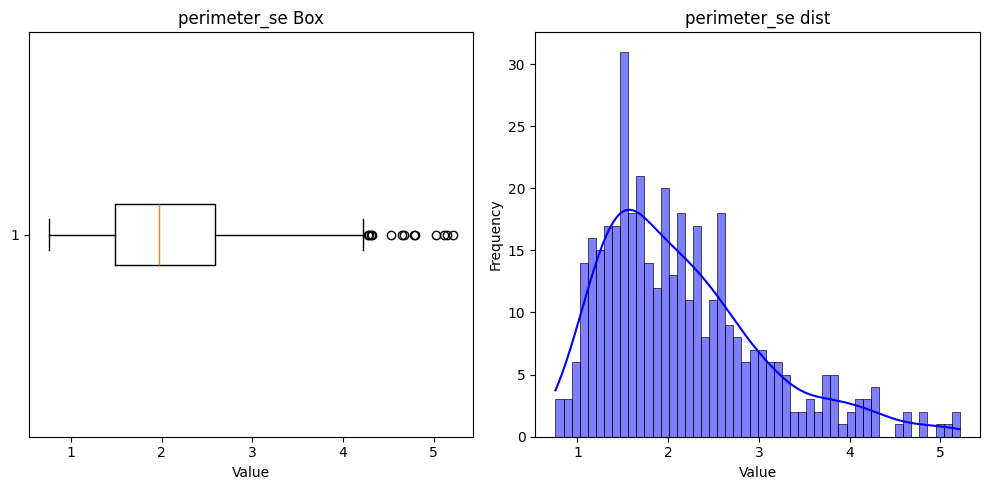

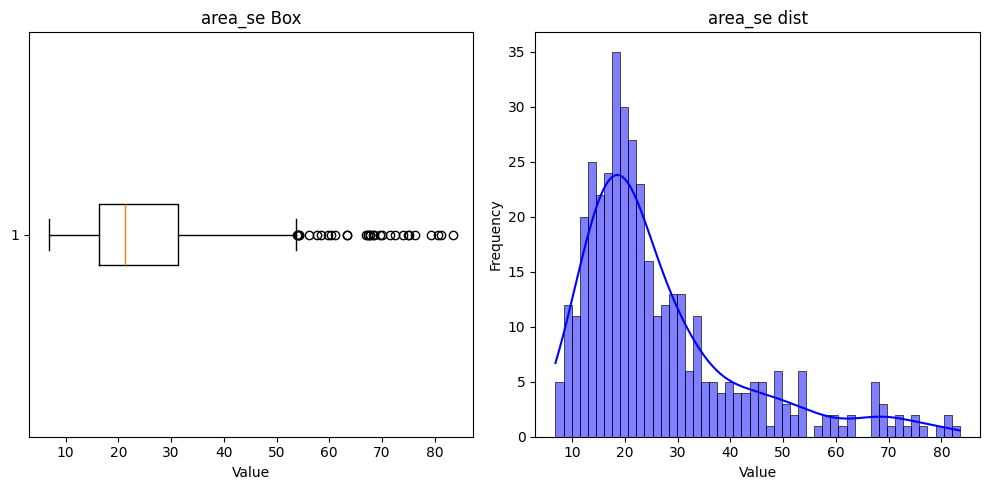

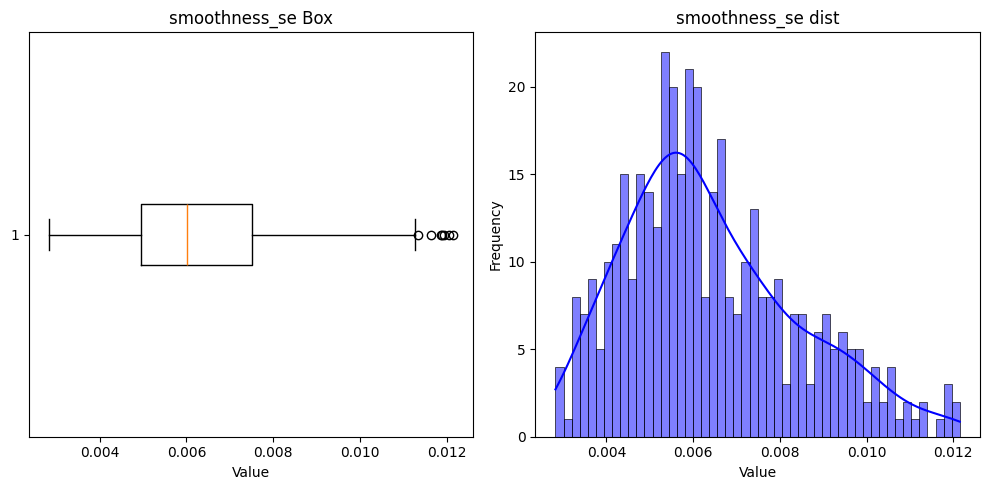

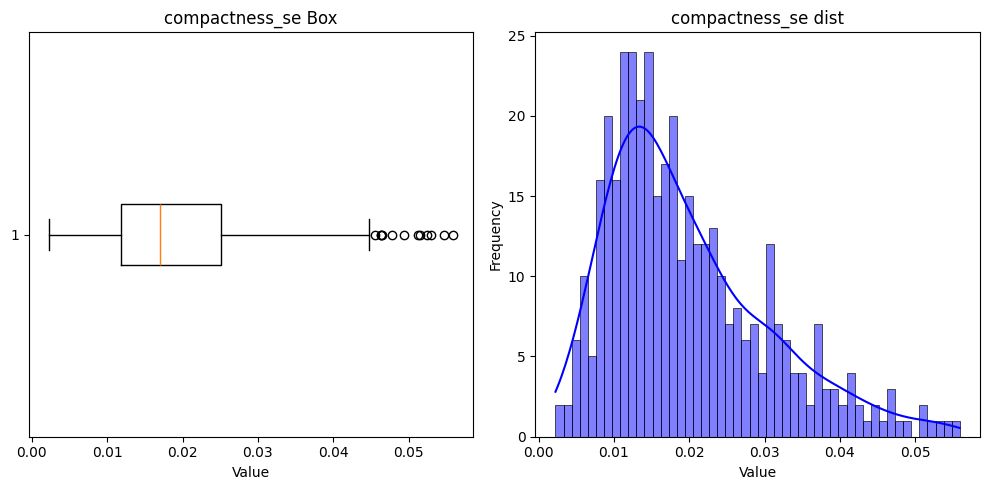

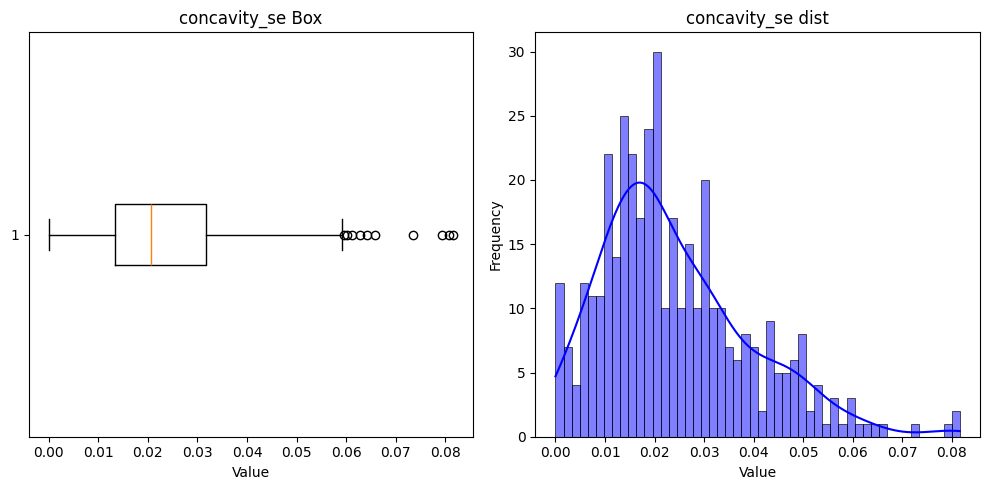

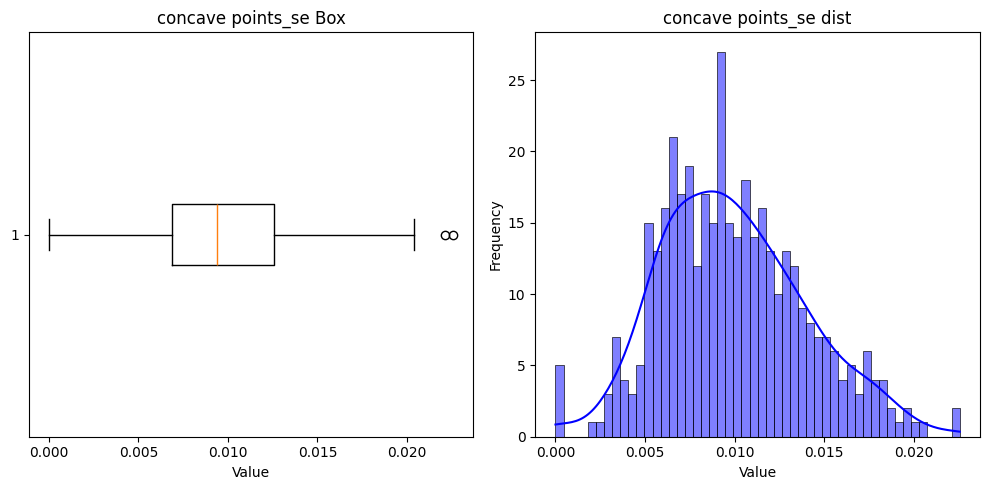

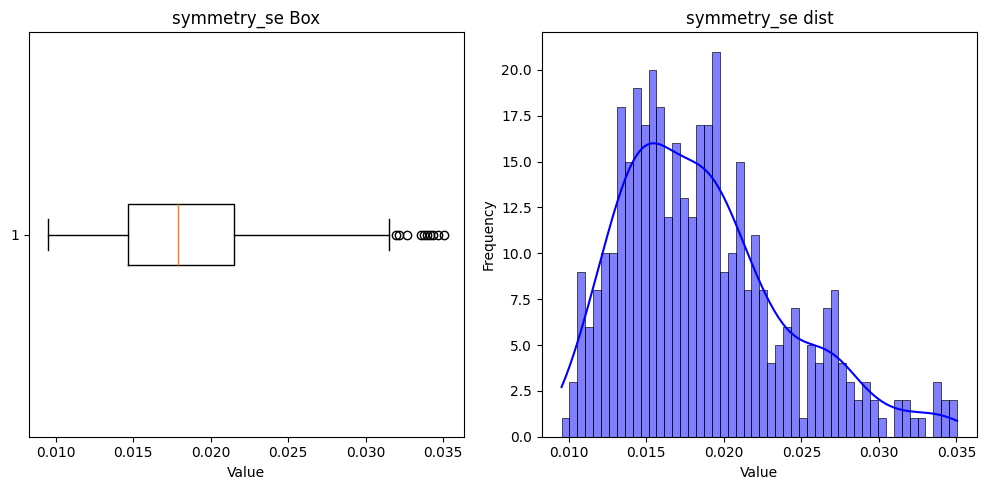

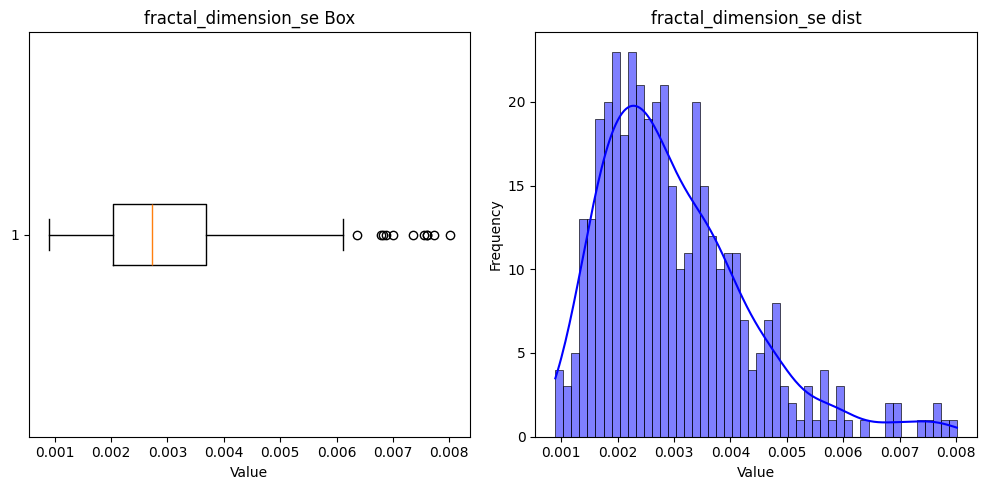

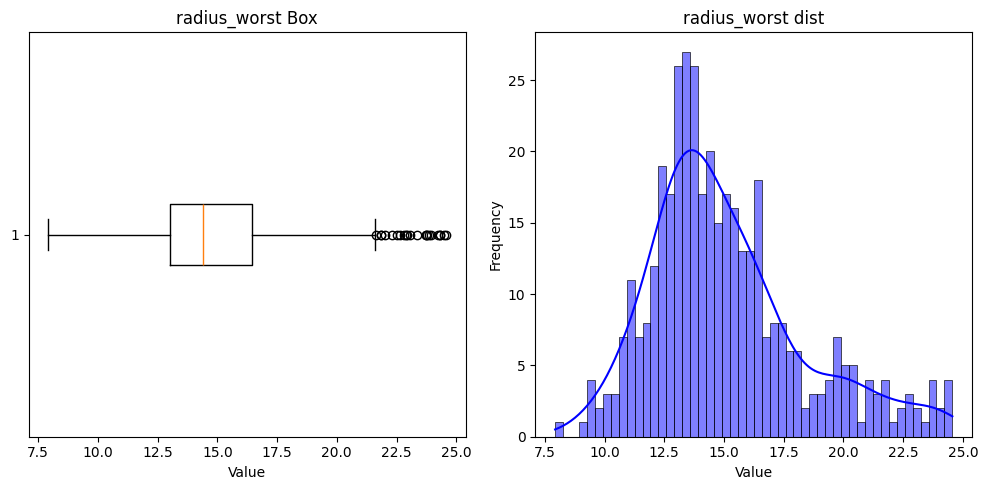

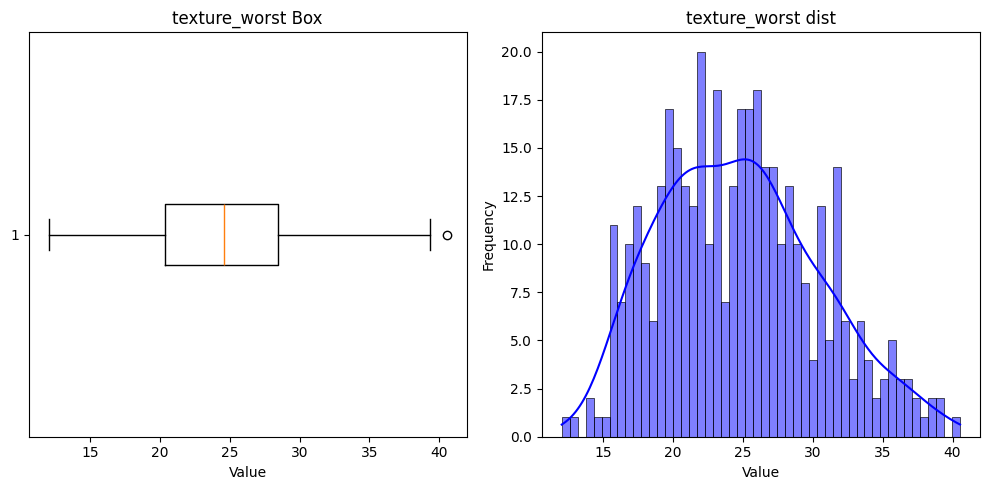

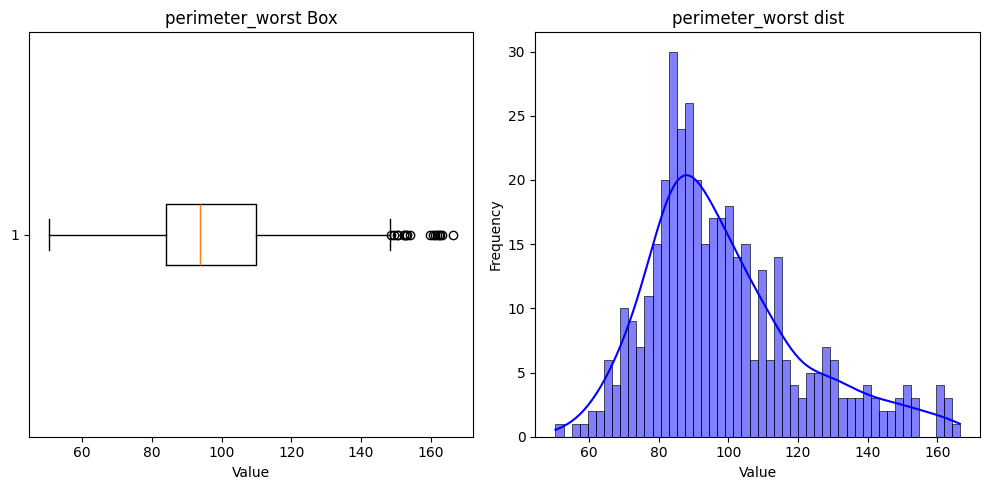

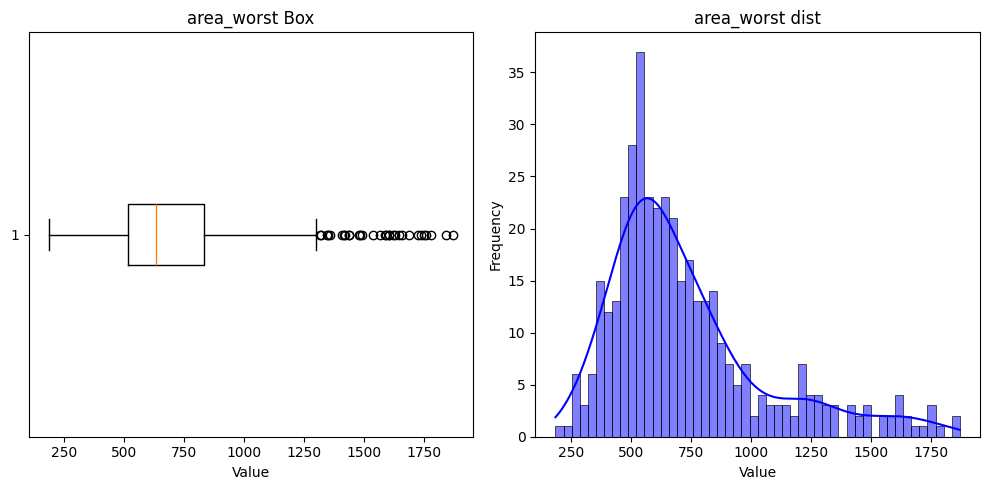

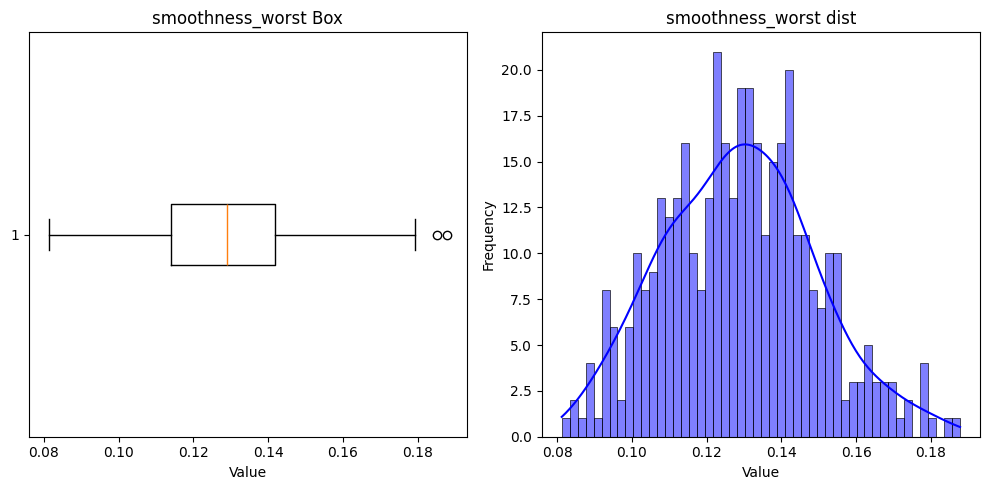

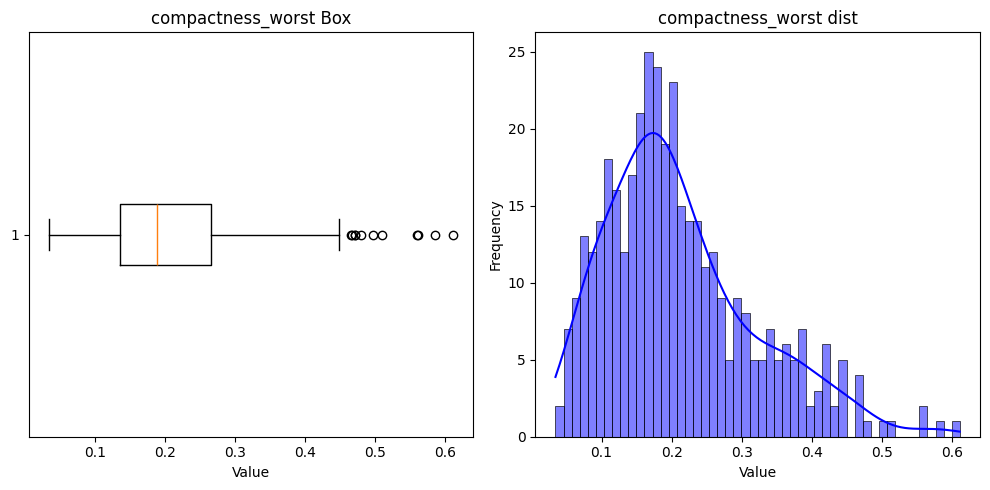

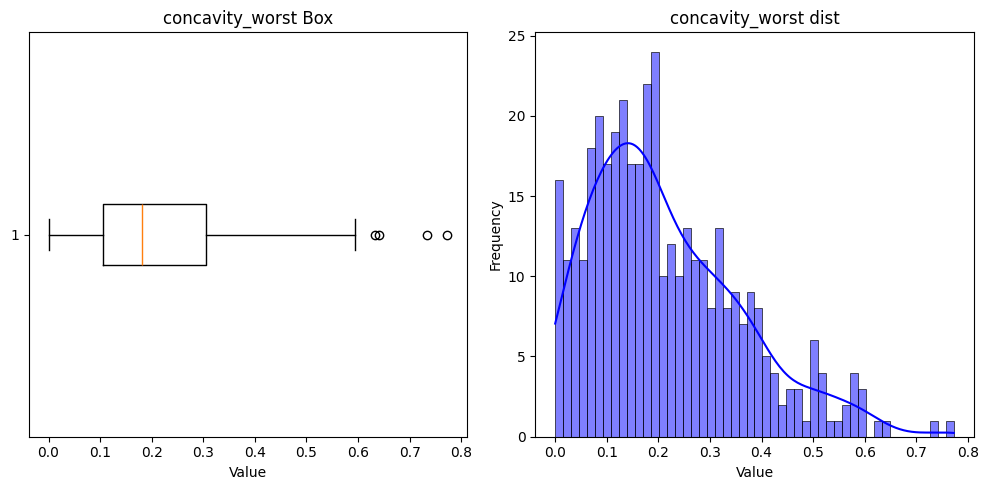

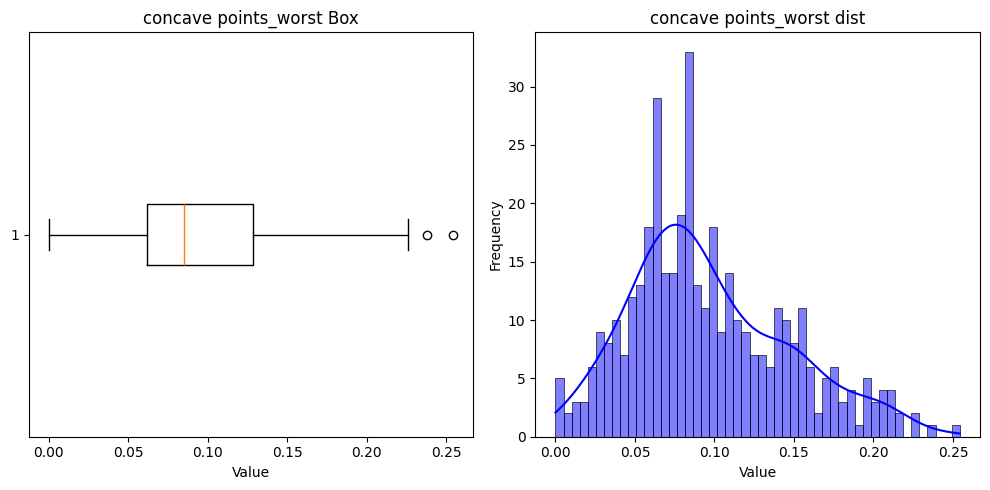

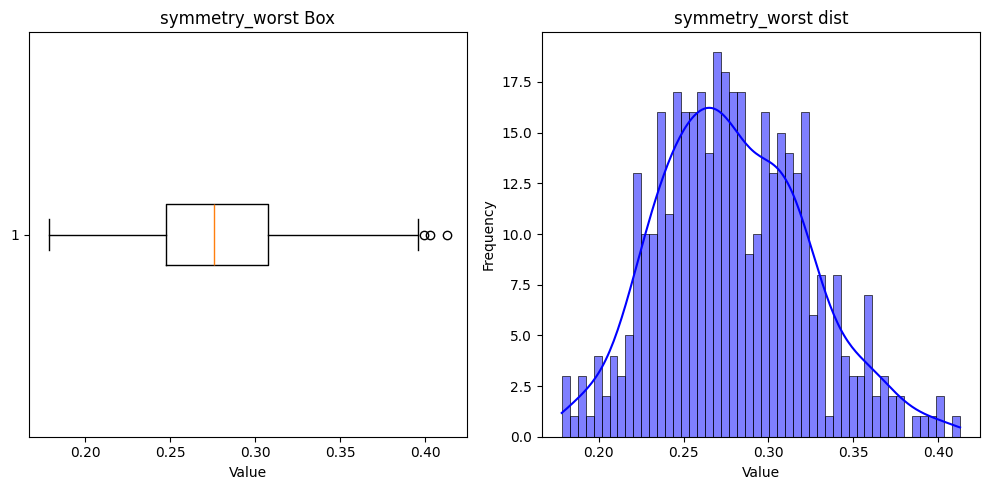

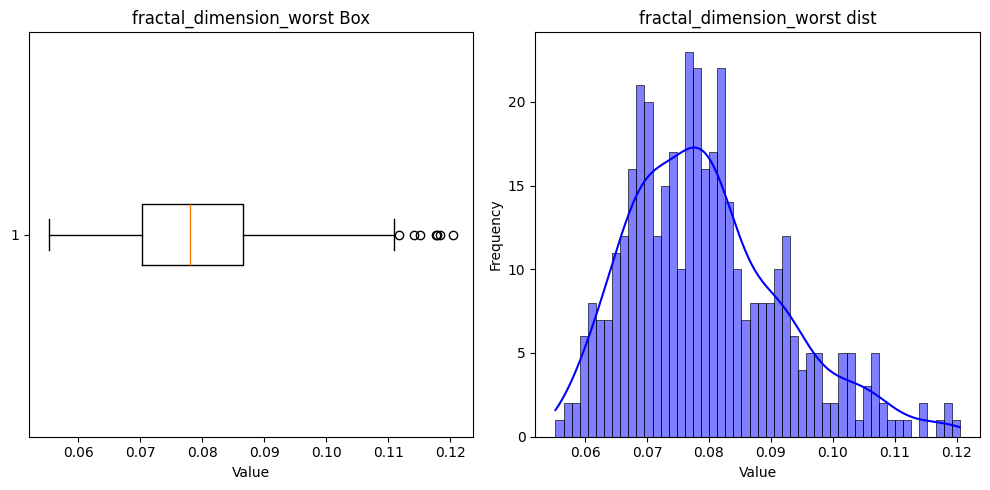

In [1]:
# IMPORT LIBRARIES
# IMPORT LIBRARIES

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

import matplotlib.pyplot as plt


breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

df = pd.read_csv(breast_cancer_csv)

df.info()
df.head()
df.corr
# Count of NaN values in each column
nan_count = df.isna().sum()

print('count of null')
print(nan_count)

print('null anywhere')
df.duplicated().sum()
df.describe()
# Drop unnamed columns
df.drop(columns=['id','Unnamed: 32'],inplace=True)

##Check the outliers
columns = df.columns
for column in columns:
    if df[column].dtype == 'float64':
        fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))

        ax_box.boxplot(df[column], vert=False, whis=1.5)
        ax_box.set_xlabel('Value')
        ax_box.set_title(f'{column} Box')

        sns.histplot(df[column], bins=50, color='blue', kde=True, ax=ax_hist)
        ax_hist.set_xlabel('Value')
        ax_hist.set_ylabel('Frequency')
        ax_hist.set_title(f'{column} dist')

        # Show plot
        plt.tight_layout()
        plt.show()

##From this we can see have outlier and this will affect to the data then i will deal 
# with thia outlier
filter_data=pd.DataFrame()
for column in columns:
    if df[column].dtype=='float64':
        filter_data[column]=df[column]
print(filter_data.info())
for column in filter_data.columns:
    Q1 = filter_data[column].quantile(0.25)
    Q3 = filter_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = filter_data[(filter_data[column] >= lower_bound) & (filter_data[column] <= upper_bound)][column]

df.dropna(inplace=True)

## show the outliers after dealing with outliers
columns = df.columns
for column in columns:
    if df[column].dtype == 'float64':
        fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))

        ax_box.boxplot(df[column], vert=False, whis=1.5)
        ax_box.set_xlabel('Value')
        ax_box.set_title(f'{column} Box')

        sns.histplot(df[column], bins=50, color='blue', kde=True, ax=ax_hist)
        ax_hist.set_xlabel('Value')
        ax_hist.set_ylabel('Frequency')
        ax_hist.set_title(f'{column} dist')

        # Show plot
        plt.tight_layout()
        plt.show()

In [2]:
# Function to clean NaN values
def clean_data(df):
    df = df.dropna()  # Drop rows with any NaN values
    # Or, alternatively, fill NaN values with the mean of the column
    #df = df.fillna(df.mean())
    return df

In [3]:
# Example usage with a dataframe df and the target column 'diagnosis'
df = pd.read_csv('breast-cancer-wisconsin-data.csv')
#df = clean_data(df)

def print_rows_with_null(df):
    null_rows = df[df.isnull().any(axis=1)]
    if null_rows.empty:
        print("No rows with null values found.")
    else:
        print("Rows with null values:")
        print(null_rows)

def print_columns_with_null(df):
    columns_with_null = df.columns[df.isnull().any()].tolist()
    if not columns_with_null:
        print("No columns with null values found.")
    else:
        print("Columns with null values:")
        for column in columns_with_null:
            print(column)

print_rows_with_null(df)
print_columns_with_null(df)


Rows with null values:
           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

    

In [4]:
df = df.drop('Unnamed: 32', axis=1)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
<<ALL>>
- Is there an output variable (label)?
<<malignant>>
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [X] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [X ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [7]:
# ANSWER

#First split the data to X all data and Y is target
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [8]:
# Function to split the data
def split_data(df, target_column, test_size=0.3, random_state=42):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [9]:
# Function to standardize data
def standardize_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Function to define and fit the bagging model
def train_bagging_model(X_train, y_train, n_estimators=50, random_state=42):
    model = BaggingClassifier(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)
    return model

# Function to define and fit the boosting model
def train_boosting_model(X_train, y_train, n_estimators=50, random_state=42):
    model = GradientBoostingClassifier(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)
    return model

# Function to define and fit the stacking model
def train_stacking_model(X_train, y_train, base_estimators, final_estimator, random_state=42):
    model = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator, passthrough=True, cv=5)
    model.fit(X_train, y_train)
    return model

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [10]:
# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
    print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
    
    print("Classification Report (Train):")
    print(classification_report(y_train, train_predictions))
    
    print("Classification Report (Test):")
    print(classification_report(y_test, test_predictions))
    
    return train_accuracy, test_accuracy

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [11]:
# Function to plot training vs test curve for accuracy
def plot_training_vs_test_curve(train_accuracies, test_accuracies, title='Training vs Test Accuracy'):
    plt.figure(figsize=(10, 6))
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

In [12]:
# Function to plot misclassification error for training vs test
def plot_misclassification_error(train_errors, test_errors, title='Training vs Test Misclassification Error'):
    plt.figure(figsize=(10, 6))
    plt.plot(train_errors, label='Training Error')
    plt.plot(test_errors, label='Test Error')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Misclassification Error')
    plt.title(title)
    plt.legend()
    plt.show()

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

Training Accuracy: 99.25%
Test Accuracy: 95.32%
Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       249
           1       0.99      0.99      0.99       149

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Training Accuracy: 100.00%
Test Accuracy: 95.91%
Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00     

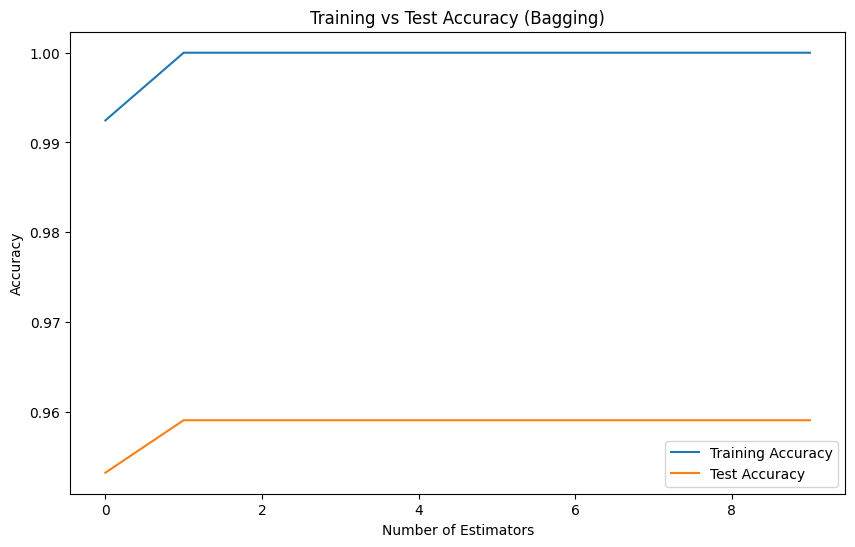

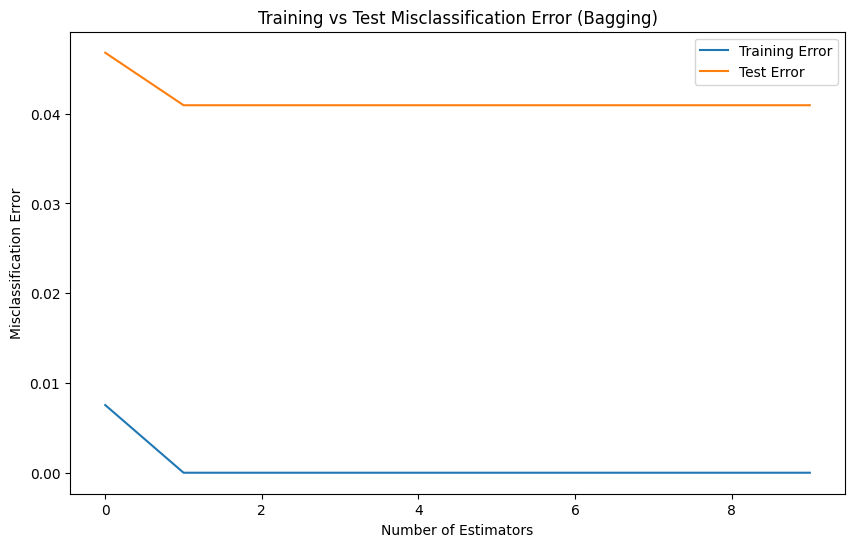

Training Accuracy: 98.74%
Test Accuracy: 97.66%
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       249
           1       1.00      0.97      0.98       149

    accuracy                           0.99       398
   macro avg       0.99      0.98      0.99       398
weighted avg       0.99      0.99      0.99       398

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Training Accuracy: 99.25%
Test Accuracy: 97.66%
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       249
           1       1.00      0.98      0.99      

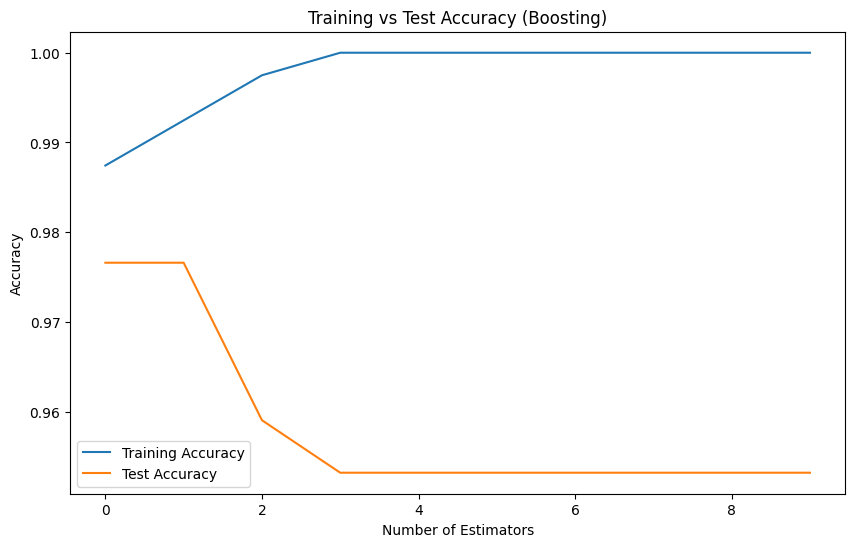

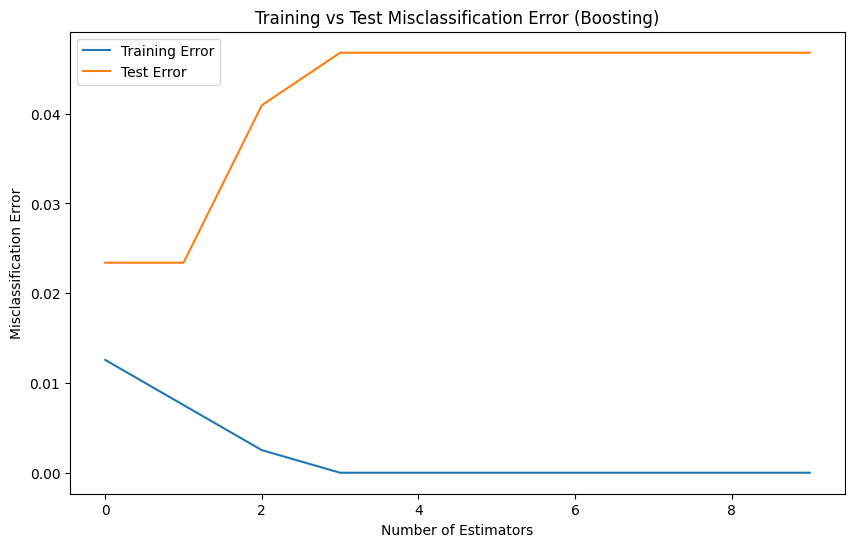

Training Accuracy: 99.25%
Test Accuracy: 98.83%
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       249
           1       1.00      0.98      0.99       149

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Training Accuracy: 99.25%
Test Accuracy: 98.83%
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       249
           1       1.00      0.98      0.99      

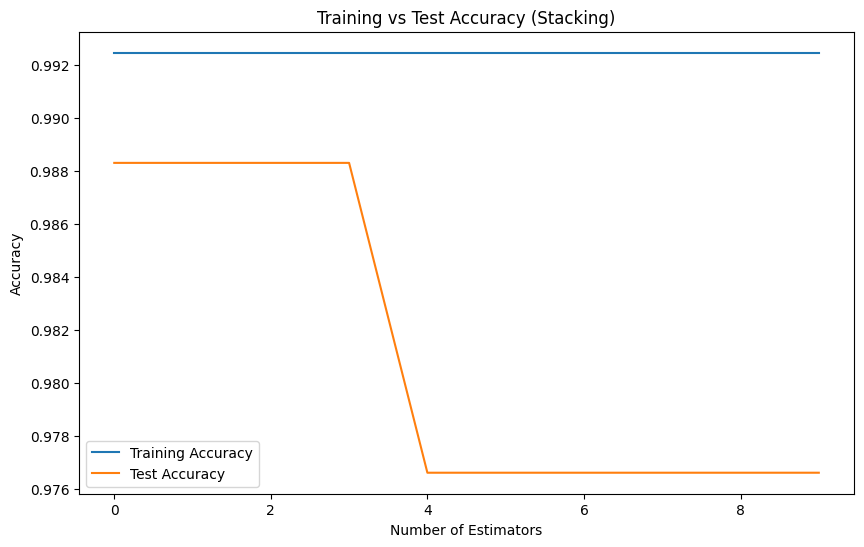

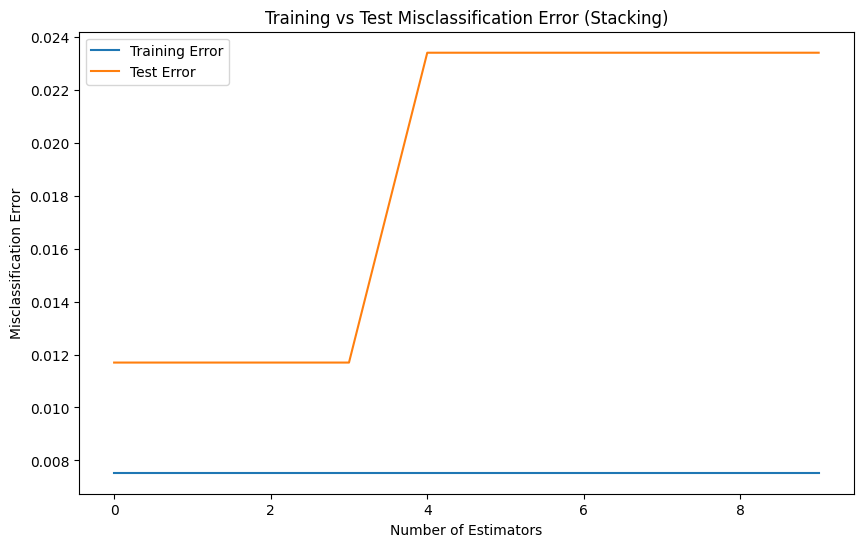

In [13]:
# Main workflow
def main(df, target_column, model_type='bagging'):
    X_train, X_test, y_train, y_test = split_data(df, target_column)
    X_train_scaled, X_test_scaled = standardize_data(X_train, X_test)
    
    n_estimators_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    train_accuracies = []
    test_accuracies = []
    train_errors = []
    test_errors = []
    
    for n_estimators in n_estimators_list:
        if model_type == 'bagging':
            model = train_bagging_model(X_train_scaled, y_train, n_estimators=n_estimators)
        elif model_type == 'boosting':
            model = train_boosting_model(X_train_scaled, y_train, n_estimators=n_estimators)
        elif model_type == 'stacking':
            base_estimators = [
                ('bagging', BaggingClassifier(n_estimators=n_estimators, random_state=42)),
                ('boosting', GradientBoostingClassifier(n_estimators=n_estimators, random_state=42))
            ]
            final_estimator = LogisticRegression()
            model = train_stacking_model(X_train_scaled, y_train, base_estimators, final_estimator)
        else:
            raise ValueError("Invalid model_type. Choose 'bagging', 'boosting', or 'stacking'.")
        
        train_accuracy, test_accuracy = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        
        train_error = 1 - train_accuracy
        test_error = 1 - test_accuracy
        train_errors.append(train_error)
        test_errors.append(test_error)
    
    plot_training_vs_test_curve(train_accuracies, test_accuracies, title=f'Training vs Test Accuracy ({model_type.capitalize()})')
    plot_misclassification_error(train_errors, test_errors, title=f'Training vs Test Misclassification Error ({model_type.capitalize()})')




main(df, 'diagnosis', model_type='bagging')  # For bagging
main(df, 'diagnosis', model_type='boosting')  # For boosting
main(df, 'diagnosis', model_type='stacking')  # For stacking



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



